In [15]:
# 游泳池容量
pool_volume = 30  # 立方米

# 电解槽数量
electrolyzer_count = 960

# 计算每个电解槽的容积
electrolyzer_volume = pool_volume / electrolyzer_count

# 电解片电流和电流密度
current = 25  # A
current_density = 800  # A/m^2

# 计算每个电解片的面积
electrode_area = current / current_density  # 平方米

# 计算电解片边长（假设电解片为正方形）
electrode_length = electrode_width = (electrode_area) ** 0.5  # 米

# 输出结果
print(f"每个电解槽的容积: {electrolyzer_volume:.4f} 立方米")
print(f"电解片面积: {electrode_area:.4f} 平方米")
print(f"电解片边长: {electrode_length:.4f} 米")


每个电解槽的容积: 0.0312 立方米
电解片面积: 0.0312 平方米
电解片边长: 0.1768 米


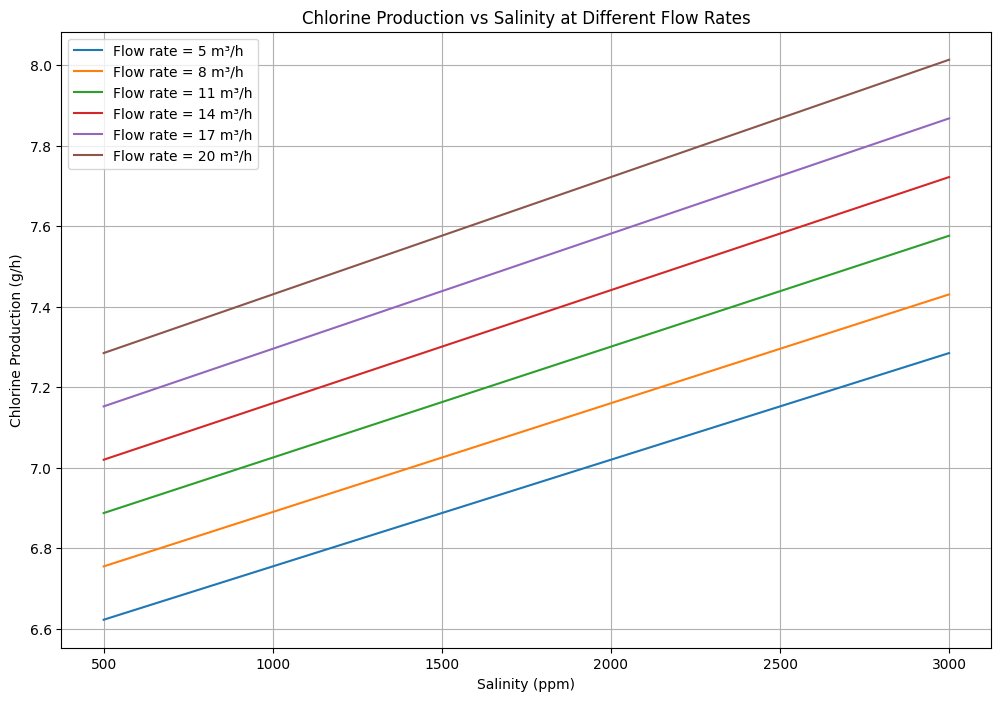

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 常量
I = 10  # 恒定电流（安培）
t = 3600  # 时间（秒）= 1小时
F = 96485  # 法拉第常数（库伦/摩尔）
M_Cl2 = 35.5  # 氯气摩尔质量（克/摩尔）

# 盐度和流速范围
salinity_levels = np.array([500, 1000, 1500, 2000, 2500, 3000])  # ppm
flow_rates = np.array([5, 8, 11, 14, 17, 20])  # m³/h

# 盐度和流速影响系数
k_s = 0.1  # 盐度影响系数
k_f = 0.1  # 流速影响系数

# 基础产氯量计算（不考虑盐度和流速影响）
base_chlorine_production = (I * t * M_Cl2) / (2 * F)  # 克

# 计算不同盐度和流速下的产氯量
chlorine_productions = np.zeros((len(flow_rates), len(salinity_levels)))

for i, flow_rate in enumerate(flow_rates):
    for j, salinity in enumerate(salinity_levels):
        salinity_factor = 1 + k_s * (salinity - 500) / 2500
        flow_rate_factor = 1 + k_f * (flow_rate - 5) / 15
        chlorine_productions[i, j] = base_chlorine_production * salinity_factor * flow_rate_factor

# 绘图
plt.figure(figsize=(12, 8))

for i, flow_rate in enumerate(flow_rates):
    plt.plot(salinity_levels, chlorine_productions[i], label=f'Flow rate = {flow_rate} m³/h')

plt.xlabel('Salinity (ppm)')
plt.ylabel('Chlorine Production (g/h)')
plt.title('Chlorine Production vs Salinity at Different Flow Rates')
plt.legend()
plt.grid(True)
plt.show()
